In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
dna=pd.read_table('human_data.txt')

In [8]:
dna.shape

(4380, 2)

In [9]:
dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [11]:
dna.columns=['sequence', 'label']

In [17]:
dna.label=dna.label.map({0:1,
                        1:1,
                        2:1,
                        3:1,
                        4:0,
                        5:0,
                        6:0,
                        })

In [19]:
dna.head()

,sequence,label
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,0
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,0
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,1
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,1
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,1


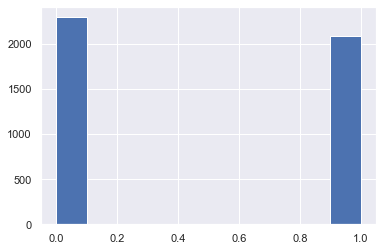

In [20]:
dna.label.hist()

In [21]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [22]:
dna['words'] = dna.apply(lambda x: getKmers(x['sequence']), axis=1)
dna = dna.drop('sequence', axis=1)

In [23]:
dna

,label,words
0,0,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,0,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,1,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,1,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,1,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
...,...,...
4375,1,"[atggaa, tggaag, ggaaga, gaagat, aagatt, agatt..."
4376,0,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4377,0,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4378,0,"[atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc..."


In [24]:
texts = list(dna['words'])
for item in range(len(texts)):
    texts[item] = ' '.join(texts[item])
y_h = dna.iloc[:, 0].values 

In [25]:
y_h

array([0, 0, 1, ..., 0, 0, 0])

In [26]:
texts[0]

'atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaa

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(texts)


In [28]:
print(X.shape)


(4380, 232414)


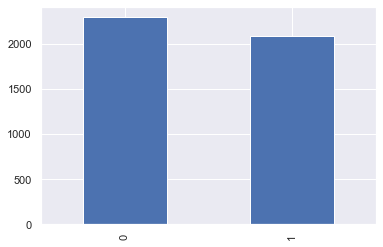

In [29]:
dna['label'].value_counts().sort_index().plot.bar()


In [30]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_h, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score,make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

def NB_GridSearch(X_train, y_train):
    grid_params = {'alpha':[0.1,0.2,0.3,0.4,0.5],
                     'fit_prior': [True, False],  }
    
    gs = GridSearchCV( MultinomialNB(), grid_params,scoring='f1')
    gs.fit(X_train, y_train)
    print("Best Score: ", gs.best_score_)
    print("Best Alpha: ", gs.best_params_)

    return gs.best_params_.values()

In [51]:
# to get best score and best alpha
alpha1,fit_prior1=NB_GridSearch(X_train, y_train)

Best Score:  0.9725013325951288
Best Alpha:  {'alpha': 0.4, 'fit_prior': False}


In [52]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.4)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.4, class_prior=None, fit_prior=True)

In [53]:
y_pred = classifier.predict(X_test)


In [54]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

Confusion matrix

Predicted    0    1
Actual             
0          460    5
1           11  400


In [55]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.982 
precision = 0.982 
recall = 0.982 
f1 = 0.982


In [56]:
# thanks to :https://realpython.com/python-keras-text-classification/
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
import tensorflow as tf

Using TensorFlow backend.


In [71]:
from keras import regularizers
import random
def history_model(X_train, y_train,X_test, y_test):
    #Before we build our model, we need to know the input dimension of our feature vectors.
    input_dim = X_train.shape[1] 
    # Add layers one by one in order 
    random.seed(123)
    model = Sequential()
    model.add(keras.layers.Dense(20, input_dim=input_dim, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    opt = SGD(lr=0.001, momentum=0.9)
    #specify the optimizer and the loss function.
    model.compile(loss='binary_crossentropy', 
                  optimizer=opt, 
                  metrics=['accuracy'])

    #Give an overview of the model and the number of parameters available for training:
    model.summary()
    # # fit the model
    history = model.fit(X_train, y_train,epochs=50, verbose=1,
                    validation_data=(X_test, y_test),batch_size=50)
    return history, model

In [72]:
def nn_result_prediction(X_train, y_train,X_test, y_test,model):
    # obtian Accuracies for train data and test data
    loss1, accuracy1 = model.evaluate(X_train, y_train, verbose=False)
    print("Training Accuracy: {:.4f}".format(accuracy1))
    loss2, accuracy2 = model.evaluate(X_test, y_test, verbose=False)
    print("Testing Accuracy:  {:.4f}".format(accuracy2))
    #prediction
    nn_train_pre=model.predict_classes(X_train)
    nn_test_pre=model.predict_classes(X_test)

    # calculate f1 scores for test data and train data 
    nn_f1_score_test=f1_score(y_test,nn_test_pre)
    nn_f1_score_train=f1_score(y_train,nn_train_pre)

    print("Train data f1 score:{}".format(nn_f1_score_train))
    print("Test data f1 score:{}".format(nn_f1_score_test ))
    print("confusion_matrix:{}".format(confusion_matrix(y_test, nn_test_pre)))
    return nn_train_pre,nn_test_pre

In [73]:
history, model=history_model(X_train, y_train,X_test, y_test)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                4648300   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 4,648,321
Trainable params: 4,648,321
Non-trainable params: 0
_________________________________________________________________
Train on 3504 samples, validate on 876 samples
Epoch 1/50
3504/3504 [==============================] - 8s 2ms/step - loss: 0.5871 - accuracy: 0.7586 - val_loss: 0.4815 - val_accuracy: 0.9326
Epoch 2/50
3504/3504 [==============================] - 7s 2ms/step - loss: 0.3889 - accuracy: 0.9823 - val_loss: 0.3616 - val_accuracy: 0.9772
Epoch 3/50
3504/3504 [==============================] - 7s 2ms/step - loss: 0.2862 - accuracy: 0.9906 - val_loss: 0.2918 - val_accuracy: 0.9783
Epoch 4/50
3504/3504 [=====

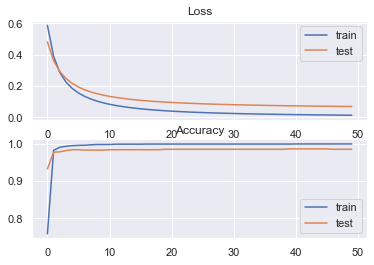

In [74]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [75]:
# create a function to show the resunlts
from sklearn.metrics import confusion_matrix

def nn_result_prediction(X_train, y_train,X_test, y_test,model): 
    #prediction
    nn_train_pre=model.predict_classes(X_train)
    nn_test_pre=model.predict_classes(X_test)
    # calculate f1 scores for test data and train data 
    nn_f1_score_test=f1_score(y_test,nn_test_pre)
    nn_f1_score_train=f1_score(y_train,nn_train_pre)
    print("Train data f1 score:{}".format(nn_f1_score_train))
    print("Test data f1 score:{}".format(nn_f1_score_test ))
    
    print("confusion_matrix:{}".format(confusion_matrix(y_test, nn_test_pre)))

    return nn_train_pre,nn_test_pre

In [76]:
# using the function above to show the result
nn_train_pre,nn_test_pre=nn_result_prediction(X_train, y_train,X_test, y_test,model)


Train data f1 score:0.9994026284348865
Test data f1 score:0.9840881272949816
confusion_matrix:[[461   4]
 [  9 402]]


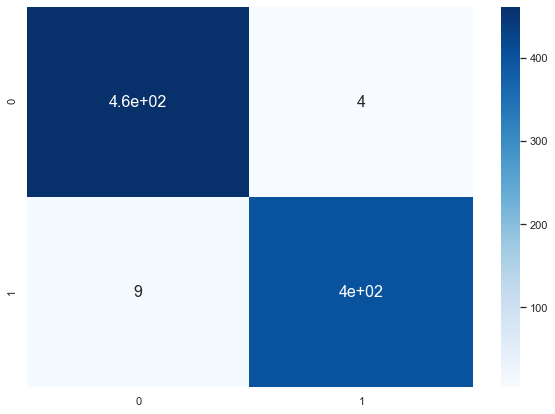

In [77]:
df_cm = pd.DataFrame(confusion_matrix(y_test, nn_test_pre), index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True ,cmap='Blues',annot_kws={"size": 16})